1. 载入图片并显示

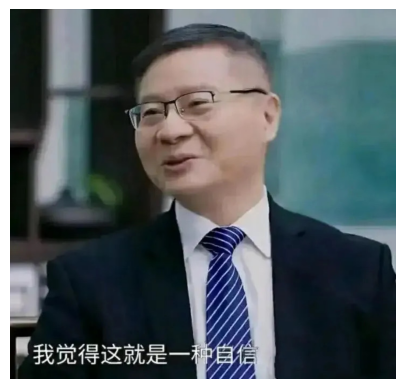

(691, 720, 3)


In [1]:
import matplotlib.pyplot as plt # plt用于显示图片
import matplotlib.image as mpimg # mping用于读取图片
import torch
import torchvision.transforms as transforms

myimg = mpimg.imread("D:/1670211885840.jpeg")   # 读取图片
plt.imshow(myimg)   # 显示图片
plt.axis('off')     # 不显示坐标轴
plt.show()
print(myimg.shape)

2. 将图片数据转为张量

In [2]:
pil2tensor = transforms.ToTensor()  # 实例化ToTensor对象
rgb_img = pil2tensor(myimg)     # 进行图片转换
print(rgb_img[0][0])            # 输出图片的部分数据
print(rgb_img.shape)            # 输出图片的形状

tensor([0.0510, 0.0549, 0.0549, 0.0510, 0.0510, 0.0510, 0.0510, 0.0510, 0.0392,
        0.0392, 0.0392, 0.0471, 0.0471, 0.0471, 0.0471, 0.0471, 0.0471, 0.0471,
        0.0471, 0.0549, 0.0549, 0.0588, 0.0588, 0.0588, 0.0667, 0.0667, 0.0667,
        0.0667, 0.0627, 0.0588, 0.0588, 0.0549, 0.0549, 0.0549, 0.0510, 0.0510,
        0.0510, 0.0510, 0.0510, 0.0510, 0.0431, 0.0431, 0.0431, 0.0431, 0.0431,
        0.0471, 0.0471, 0.0471, 0.0353, 0.0353, 0.0353, 0.0431, 0.0431, 0.0471,
        0.0431, 0.0431, 0.0471, 0.0667, 0.0902, 0.1137, 0.1176, 0.1255, 0.1373,
        0.1490, 0.1373, 0.1569, 0.1686, 0.1882, 0.2196, 0.2549, 0.2824, 0.3137,
        0.3647, 0.3922, 0.4275, 0.4431, 0.4510, 0.4667, 0.4980, 0.5255, 0.5451,
        0.5569, 0.5765, 0.5882, 0.5843, 0.5882, 0.5922, 0.5922, 0.5922, 0.5922,
        0.5961, 0.5961, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
        0.6000, 0.5922, 0.5882, 0.5882, 0.5843, 0.5843, 0.5843, 0.5725, 0.5647,
        0.5608, 0.5608, 0.5608, 0.5608, 

d:\anaconda3\envs\pj1\lib\site-packages\torchvision\transforms\functional.py:126: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


3. 定义Sobel卷积核

In [3]:
sobelfilter = torch.tensor([
    [-1., 0., 1.],
    [-2., 0., 2.],
    [-1., 0., 1.]]*3).reshape([1,3,3,3]) # 定义sobel算法
print(sobelfilter)  # 输出卷积核

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])


4. 运行卷积核操作并显示

tensor([[[[132, 123, 124,  ..., 123, 123, 123],
          [134, 124, 123,  ..., 123, 123, 123],
          [135, 124, 124,  ..., 122, 123, 123],
          ...,
          [127, 122, 123,  ..., 123, 124, 124],
          [126, 123, 123,  ..., 123, 124, 123],
          [125, 123, 123,  ..., 123, 124, 123]]]], dtype=torch.int32)


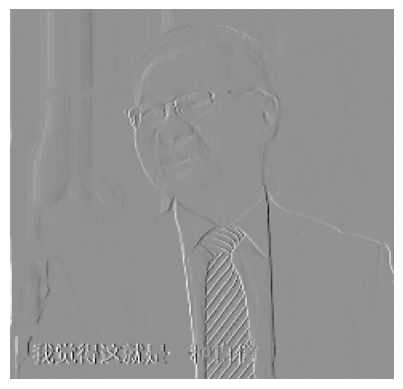

In [7]:
# 3个通道输入，生成1个特征图
op = torch.nn.functional.conv2d(rgb_img.unsqueeze(0), sobelfilter, stride=3, padding=1)

ret = (op - op.min()).div(op.max() - op.min())  # 对卷积结果进行处理
ret = ret.clamp(0., 1.).mul(255).int()          # 将卷积结果转为图片数据
print(ret)

plt.imshow(ret.squeeze(), cmap='Greys_r')       # 图片显示
plt.axis('off')                                 # 不显示坐标轴
plt.show()